<b>THE SPARKS FOUNDATION</b>


TASK 1 :-Prediction using Supervised ML (Prediction-using-Supervised-ML Data Science and Business Analytics Task (Predict the percentage of an student based on the no. of study hours) Using simple linear regression model, forecasting the marks of a student based on the numbers of hours studied per day. Tool(s) Used - Python (Jupyter Notebook on Google Colaboratory))

<b>By- K.Ashwitha</b>

In [1]:
!conda install -c anaconda seaborn -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         128 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    openssl-1.1.1k             |       h7f98852_0         2.1 MB  conda-forge
    seaborn-0.11.0             |             py_0         216 KB  anaconda
    ------------------------------------------------------------
                                           Total:         2.6 MB

The following NEW packages will be INSTALLED:

  seaborn            anaconda/noarch::seaborn-0.11.0-py_0

The foll

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [6]:
data=pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
# Check if there any null value in the Dataset
data.isnull == True


False

<b>There is no null value in the Dataset so, we can now visualize our Data.</b>


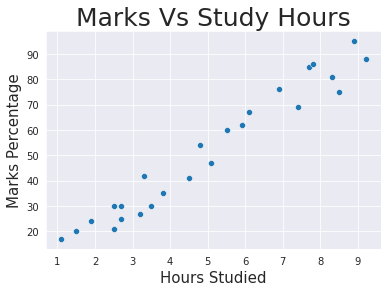

In [20]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=25)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()


<b>From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.</b>

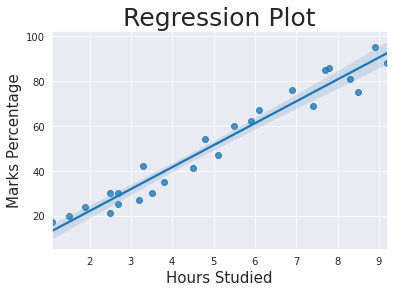

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [21]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=25)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()
print(data.corr())

<b>It is confirmed that the variables are positively correlated.
</b>


<b>Training the Model</b>

<b>1) Splitting the Data</b>

In [11]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)


<b>2) Fitting the Data into the model</b>

In [22]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


<b>Predicting the Percentage of Marks</b>

In [13]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


<b>Comparing the Predicted Marks with the Actual Marks</b>

In [14]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


<b>Visually Comparing the Predicted Marks with the Actual Marks</b>

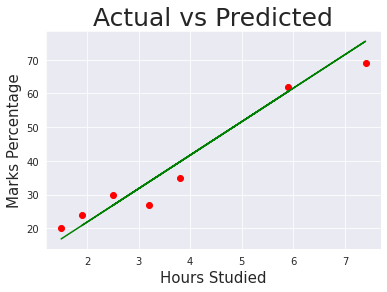

In [24]:
plt.scatter(x=val_X, y=val_y, color='red')
plt.plot(val_X, pred_y, color='green')
plt.title('Actual vs Predicted', size=25)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

<b>Evaluating the Model</b>

In [16]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))


Mean absolute error:  4.130879918502482


<b>Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.
</b>

<b>What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?</b>

In [17]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


<b>According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.</b>